In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from loss import log_t_normalizing_const
# from univariate.sampling import t_density, t_density_contour
# from univariate.sampling_new import par_density, par_density_contour
from univariate.sampling_lognor import lognor_density, lognor_density_contour

def visualize_density(model_title_list, model_gen_list, 
                      K, sample_nu_list, sample_mu_list, sample_var_list, ratio_list, xlim) :
    model_gen_list = [gen[torch.isfinite(gen)].cpu().numpy() for gen in model_gen_list]

    M = len(model_gen_list)
    input = np.arange(-xlim * 100, xlim * 100 + 1) * 0.01
    # contour = t_density_contour(input, K, sample_nu_list, sample_mu_list, sample_var_list, ratio_list).squeeze().numpy()
    contour = lognor_density_contour(input, K, sample_nu_list, sample_mu_list, sample_var_list, ratio_list).squeeze().numpy()

    # plot
    fig = plt.figure(figsize = (3.5 * M, 7))
    central_mu = min(sample_mu_list)

    for m in range(M) : 
        ax = fig.add_subplot(2,M,m+1)
        plt.plot(input, contour, color='black')
        
        plt.hist(np.exp(model_gen_list[m])+central_mu, bins = 100, range = [-10, 10], density=True, alpha = 0.5, color='dodgerblue')
        plt.xlim(-10, 10)
        plt.title(f'{model_title_list[m]}')

        ax = fig.add_subplot(2,M,M+m+1)
        plt.plot(input, contour, color='black')
        plt.hist(np.exp(model_gen_list[m])+central_mu, bins = 100, range = [-10, 10], density=True, alpha = 0.5, color='dodgerblue')
        plt.xlim(-xlim, xlim)
        plt.yscale("log")
        plt.ylim(1e-6, 1)

    return fig

/home/parkdasy/.conda/envs/t3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dirname = "results"
K=2
sample_nu_list = [0.8, 0.2] #[5.0, 5.0]
sample_mu_list = [mu * torch.ones(1) for mu in [0.0, 2.0]] # [-2.0, 2.0]] 
sample_var_list = [var * torch.ones(1,1) for var in [0.8, 0.2]]
ratio_list = [0.6, 0.4]
xlim = 30



In [6]:
from util import make_reproducibility
from mmd import make_masking, mmd_linear, mmd_linear_bootstrap_test

file_list = np.asarray(os.listdir(f'./1D_results/{dirname}'))
csv_list = file_list[np.where(['.csv' in name for name in  file_list])[0]]
csv_list = np.asarray([name[0:-4] for name in csv_list])
csv_list = csv_list[np.where(csv_list != 'test_data')[0]]
csv_selected = [
    't3VAE_nu_9.0', 't3VAE_nu_12.0', 't3VAE_nu_15.0', 't3VAE_nu_18.0', 't3VAE_nu_21.0', 
    'VAE', 'betaVAE_0.1', 't-VAE', 'Disentangled_VAE_nu_9.0', 'VAE-st_nu_12.0'
]

name_list = [
    r't3VAE ($\nu=9.0$)', r't3VAE ($\nu=12.0$)', r't3VAE ($\nu=15.0$)', r't3VAE ($\nu=18.0$)', r't3VAE ($\nu=21.0$)', 
    'VAE', r'$\beta$-VAE ($\beta = 0.1$)', 'Student-t VAE', r'DE-VAE ($\nu = 9.0$)', r'VAE-st ($\nu = 12.0$)'
]

gen_list = [np.asarray(pd.read_csv(f'./1D_results/{dirname}/{csv_name}.csv', header = None)) for csv_name in csv_selected]


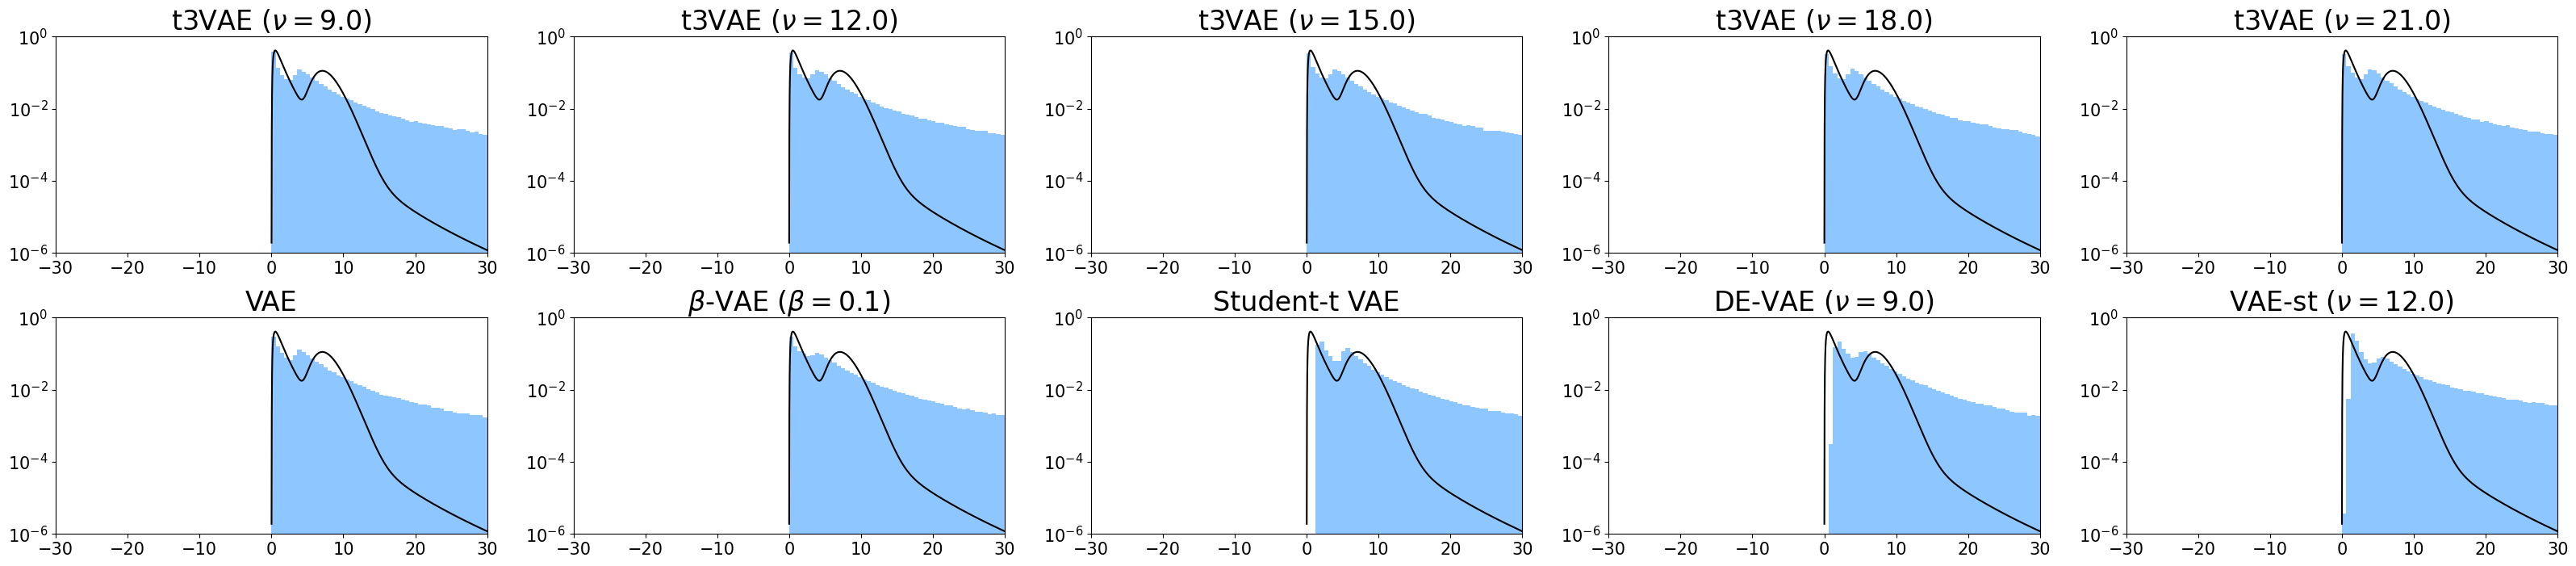

In [7]:
M = len(gen_list)
input = np.arange(-xlim * 100, xlim * 100 + 1) * 0.01
# contour = t_density_contour(input, K, sample_nu_list, sample_mu_list, sample_var_list, ratio_list).squeeze().numpy()
contour = lognor_density_contour(input, K, sample_nu_list, sample_mu_list, sample_var_list, ratio_list).squeeze().numpy()

# plot
fig = plt.figure(figsize = (4 * M, 8))

for m in range(M) : 
    
    ax = fig.add_subplot(2,5,m + 1)
    plt.plot(input, contour, color='black')
    central_mu = 0 # min(sample_mu_list).item()
    plt.hist(np.exp(gen_list[m]) + central_mu, bins = 100, range = [-xlim, xlim], density=True, alpha = 0.5, color='dodgerblue')
    plt.xlim(-xlim, xlim)
    plt.yscale("log")
    plt.ylim(1e-6, 1)
    plt.rc('xtick', labelsize=15)  
    plt.rc('ytick', labelsize=15)  
    plt.title(f'{name_list[m]}', fontdict = {'fontsize' : 24})
fig.subplots_adjust(wspace=0.2, hspace = 0.3)
fig.savefig('univariate_log_histogram.png')
plt.show()